In [61]:
import sys
sys.path.append('/home/diego/python/convolution-kernels-pytorch/')
sys.path.append('/home/diego/python/stochastic-processes/')
from kernel.base import Kernel

import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn.functional as F

from scipy.signal import fftconvolve
from processes.ou import OUProcess

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [62]:
x = torch.randn(1000, 2)

In [63]:
t_support = torch.arange(0, 100, 1)
kernel_values = torch.exp(-t_support / 10)

ker = Kernel(kernel_values=kernel_values, support=[t_support[0], t_support[-1]])

In [64]:
y = ker.convolve_continuous(x, trim=True)
y2 = ker.convolve_continuous(x, trim=False)
print(y.shape, y2.shape)

torch.Size([1000, 2]) torch.Size([1099, 2])


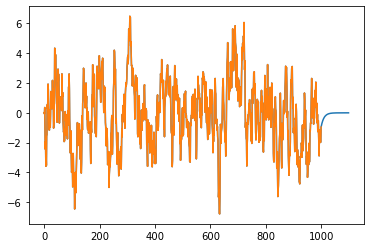

In [67]:
plt.plot(y2[:, 0])
plt.plot(y[:, 0])

In [52]:
%timeit ker.convolve_continuous(x, trim=True)

3.31 ms ± 174 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [60]:
%timeit ker.convolve_continuous(x, trim=True)

3.28 ms ± 15.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
